# Numerical integration tutorial

Here we will present and practically illustrate a few **numerical integration (quadrature)** techniques using MATLAB, ending with Simpson's rule. A more extensive and interactive lesson on this subject can be found at MathWorks' educational courseware [`Numerical-Integration`](https://github.com/MathWorks-Teaching-Resources/Numerical-Integration).

The operation of integrating a 1-D function $f(x)$ between $x=a$ and $x=b$ is the linear functional $I: L^1([a,b])\to\mathbb{R}$ where

$$
\begin{equation}
I[f] = \int_a^b f(x)\, \text{d}x.
\label{eq:integral}\tag{1}
\end{equation}
$$

For this tutorial, we will define the (Riemann-integrable) integrand to be the tapered sinusoid

$$
f(x) := e^{-\frac{x^2}{20}}\cos(x)
$$

In [1]:
f = @(x) exp(-x.^2/20).*cos(x);

and let $a=0$ and $b=10$.

In [2]:
a = 0; b = 10;

We can visualize the function by highly sampling it ($N=1000$) so that linearly interpolating between the sampled points is unnoticeably close to $f(x)$. We also use MATLAB's `integral` function (which uses an adaptive quadrature approach) as a reference throughout this tutorial.


dx =

    0.0100




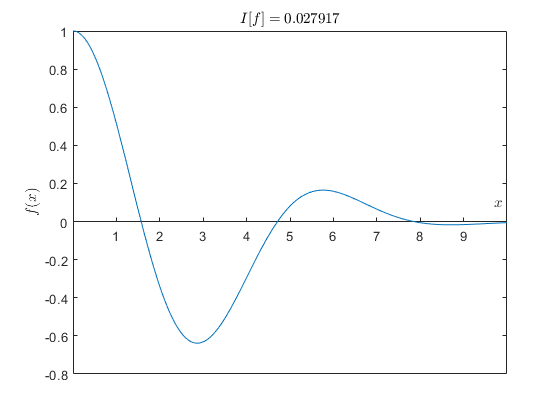

In [3]:
N = 1000;
dx = (b-a)/(N-1)
x = linspace(a,b,N);
fx = f(x);
If = integral(f,a,b);

figure
plot(x,fx)
title(sprintf("$I[f]=%f$",If),"interpreter","latex")
xlabel("$x$","interpreter","latex")
ylabel("$f(x)$","interpreter","latex")
set(gca,"XAxisLocation","origin","YAxisLocation","origin")

As a unifying concept, numerical integration techniques often focus on integrating simpler **interpolation** schemes, denoted $\hat{f}(x)$ here, of the sampled underlying integrand $f(x)$. We can sample $f(x)$ by discretizing the $x$-axis to $\{x_n\}_{n\in\{1,\dots,N\}}$ (where $x_1=a$ and $x_N=b$) to get the sequence $\{f_n\}_{n\in\{1,\dots,N\}}$, where $f_n = f(x_n)$.

## Rectangular rule

The simplest of such interpolation schemes is the constant interpolation, where between two sampled points $x_n$ and $x_{n+1}$, the function takes the constant value $f(x_n)$ or $f(x_{n+1})$. The former is called the **left rectangular rule**, using the interpolation

$$
\hat{f}_L(x) = f_n,\quad x\in(x_n,x_{n+1}).
$$

The integral of this function can be considered an approximation to the original integral ([1](#mjx-eqn-eq:integral)):

$$
\begin{equation}
I[f] \approx I[\hat{f}_L] = \int_a^b \hat{f}_L(x)\, \text{d}x = \sum_{n=1}^{N-1} f_n\, \Delta x
\label{eq:lrect}\tag{2}
\end{equation}
$$

We will visualize this for three sampling resolutions ($\Delta x$) corresponding to $N=3$, $N=7$, and $N=11$. From these plots, it's not hard to see why this is called the *rectangular* rule.


dxs =

     5


dxs =

    1.6667


dxs =

     1




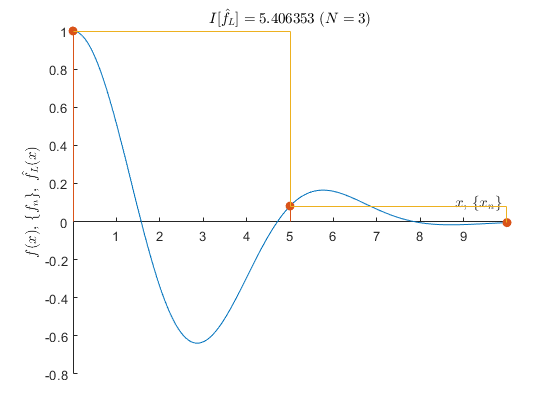

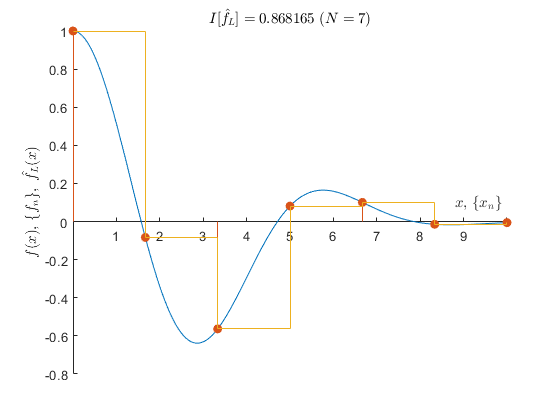

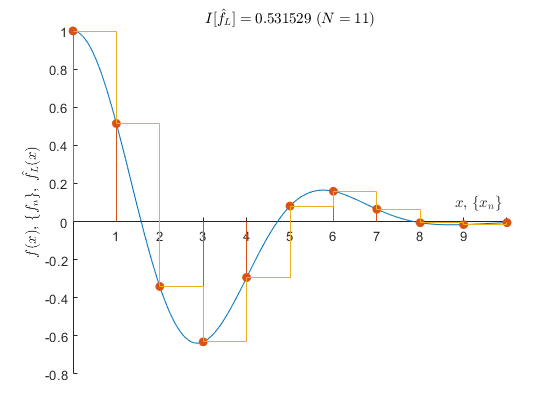

In [4]:
for Ns = 3:4:11
    dxs = (b-a)/(Ns-1)
    xs = linspace(a,b,Ns);
    fxs = f(xs);
    Ifs = sum(fxs(1:end-1))*dxs;    % Eq. (2)
    
    figure
    hold on
    plot(x,fx)
    stem(xs,fxs,"filled")
    stairs(xs,fxs)
    hold off
    title(sprintf("$I[\\hat{f}_L]=%f\\ (N=%d)$",[Ifs,Ns]),"interpreter","latex")
    xlabel("$x,\, \{x_n\}$","interpreter","latex")
    ylabel("$f(x),\, \{f_n\},\ \hat{f}_L(x)$","interpreter","latex")
    set(gca,"XAxisLocation","origin","YAxisLocation","origin")
end

The blue plot is the "true" function $f(x)$, red dots are the sequence of ordered pairs $\{(x_n,f_n)\}$, and the yellow line is the interpolation $\hat{f}(x)$ that the quadrature method utilizes.

Let's do a quick error analysis check (since it's super simple for this case). For a *single* rectangle, we can Taylor expand the integral around the "left" point:

$$
\begin{align}
\int_{x_n}^{x_n+\Delta x} f(x)\, \text{d}x &= \int_{x_n}^{x_n+\Delta x}\left( f(x_n) + \frac{f'(x_n)}{1!}(x-x_n) + \frac{f''(x_n)}{2!}(x-x_n)^2 + \cdots \right)\text{d}x\\
&= \left.\left( f(x_n)x + \frac{f'(x_n)}{2!}(x-x_n)^2 + \frac{f''(x_n)}{3!}(x-x_n)^3 + \cdots \right)\right|_{x_n}^{x_n+\Delta x}\\
&= f(x_n)\, \Delta x + \underbrace{\frac{f'(x_n)}{2!}\, \Delta x^2 + \cdots}_{\mathcal{O}(\Delta x^2)}.
\end{align}
$$

Since there are $N-1 = \frac{b-a}{\Delta x}$ rectangles, the error for the left rectangular rule for ([1](#mjx-eqn-eq:integral)) is of order $\mathcal{O}(\Delta x)$.

Similarly, the **right rectangular rule** uses the constant interpolation

$$
\hat{f}_R(x) = f_{n+1},\quad x\in(x_n,x_{n+1}).
$$

The integral can, again, be approximated by rectangular areas

$$
\begin{equation}
I[f] \approx I[\hat{f}_R] = \int_a^b \hat{f}_R(x)\, \text{d}x = \sum_{n=2}^N f_n\, \Delta x
\label{eq:rrect}\tag{3}
\end{equation}.
$$


dxs =

     5


dxs =

    1.6667


dxs =

     1




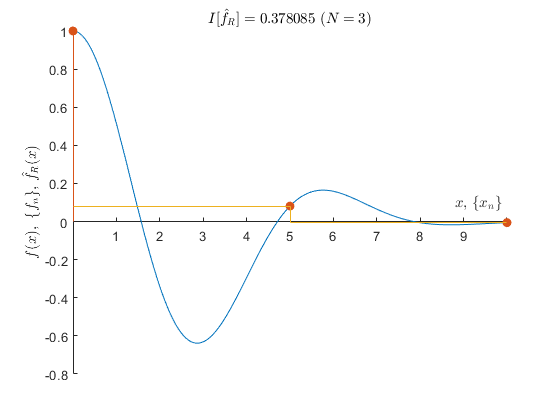

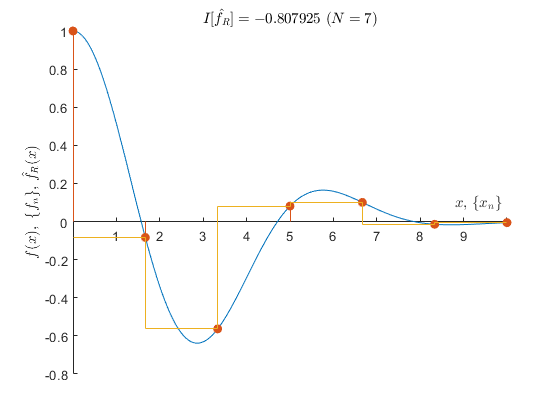

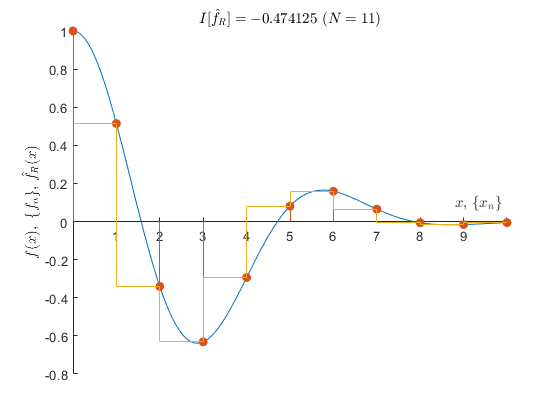

In [5]:
for Ns = 3:4:11
    dxs = (b-a)/(Ns-1)
    xs = linspace(a,b,Ns);
    fxs = f(xs);
    Ifs = sum(fxs(2:end))*dxs;    % Eq. (3)
    
    figure
    hold on
    plot(x,fx)
    stem(xs,fxs,"filled")
    stairs(xs,[fxs(2:end) fxs(end)])
    hold off
    title(sprintf("$I[\\hat{f}_R]=%f\\ (N=%d)$",[Ifs,Ns]),"interpreter","latex")
    xlabel("$x,\, \{x_n\}$","interpreter","latex")
    ylabel("$f(x),\ \{f_n\},\, \hat{f}_R(x)$","interpreter","latex")
    set(gca,"XAxisLocation","origin","YAxisLocation","origin")
end

Since we assumed $f(x)$ is Riemann integrable, the integrals using the left and right rules should both converge to $I[f]$ as $\Delta x\to0$ (albeit slowly).

## Trapezoidal rule

While the computation in the rectangular method is trivially simple, it's not hard to notice just by eye that the error in each box can be significantly cut by noticing that at small enough $\Delta x$, smooth functions can be well-approximated by straight lines. Therefore, the logical next interpolation to try is linear interpolation by creating a piecewise linear function passing through the sampled points. Between $x_n$ and $x_{n+1}$:

$$
\hat{f}_T(x) = \frac{f_{n+1}-f_n}{\Delta x}(x-x_n) + f_n,\quad x\in(x_n,x_{n+1}).
$$

The geometric object that we measure in each partition is a trapezoid, which is the average of the parallel sides (heights) multiplied by the width. In an algebraic sense, then, we can also think of it as a *mean* rectangular rule, where the interpolation is set as the constant $\frac{f_n+f_{n+1}}{2}$.

$$
\begin{equation}
I[f] \approx I[\hat{f}_T] = \int_a^b \hat{f}_T(x)\, \text{d}x = \sum_{n=1}^{N-1} \frac{f_n+f_{n+1}}{2}\, \Delta x = \frac{1}{2}\left(f_1 + 2\sum_{n=2}^{N-1}f_n + f_{N}\right)\Delta x
\label{eq:trap}\tag{3}
\end{equation}
$$


dxs =

     5


dxs =

    1.6667


dxs =

     1




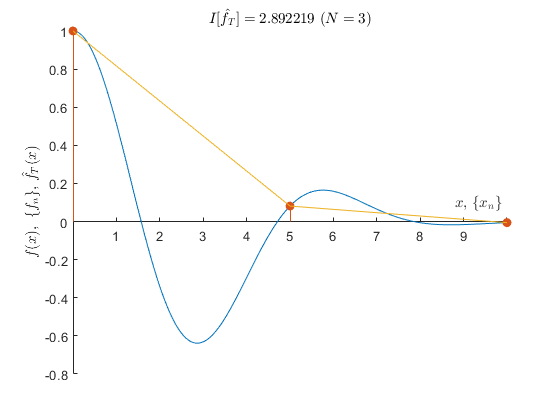

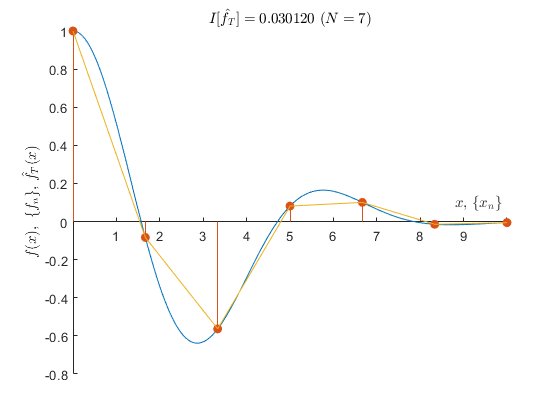

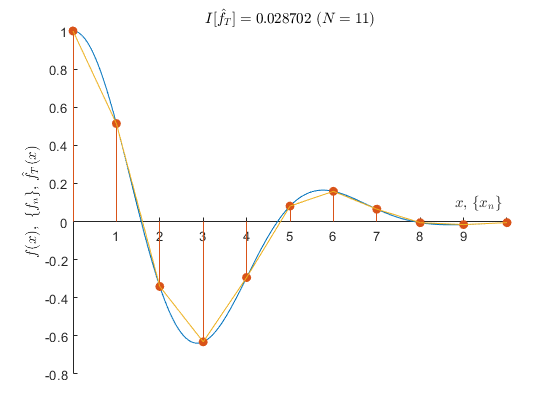

In [6]:
for Ns = 3:4:11
    dxs = (b-a)/(Ns-1)
    xs = linspace(a,b,Ns);
    fxs = f(xs);
    Ifs = (fxs(1)+2*sum(fxs(2:end-1))+fxs(end))/2*dxs;    % Eq. (3); also `trapz(fxs)*dxs`
    
    figure
    hold on
    plot(x,fx)
    stem(xs,fxs,"filled")
    plot(xs,fxs)
    hold off
    title(sprintf("$I[\\hat{f}_T]=%f\\ (N=%d)$",[Ifs,Ns]),"interpreter","latex")
    xlabel("$x,\, \{x_n\}$","interpreter","latex")
    ylabel("$f(x),\ \{f_n\},\, \hat{f}_T(x)$","interpreter","latex")
    set(gca,'XAxisLocation','origin','YAxisLocation','origin')
end

The trapezoidal method has an error of order $\mathcal{O}(\Delta x^2)$, so it's a major improvement from the rectangular rule, but as applied mathematicians, we should ask, "Can we do better?"

## Simpson's rule

What would be the next logical extension to a piecewise linear interpolation? That's right, a piecewise *quadratic* function! To make the connection, we can think of the interpolation scheme in the trapezoidal rule as $\hat{f}_T(x) = c_0^{(n)} + c_1^{(n)}x$ for $x\in(x_n,x_{n+1})$, where

$$
c_0^{(n)} = f_n - \frac{x_{n+1}-x_n}{\Delta x}x_n,\quad c_1^{(n)} = \frac{x_{n+1}-x_n}{\Delta x}.
$$

We can instead use the interpolation scheme $\hat{f}_S(x) = c_0^{(n)} + c_1^{(n)}x + c_2^{(n)}x^2$ for $x\in(x_n,x_{n+2})$, where the coefficients could be found with quadratic regression (we won't derive this here). The quadrature method that results from the quadratic interpolation is called **Simpson's (1/3) rule**.

$$
\begin{equation}
I[f] \approx I[\hat{f}_S] = \int_a^b \hat{f}_S(x)\, \text{d}x = \sum_{n\text{ odd}} \frac{f_n+4f_{n+1}+f_{n+2}}{3}\, \Delta x = \frac{1}{3}\left(f_1 + 4\sum_{\substack{n=2 \\ n\text{ even}}}^{N-1}f_n + 2\sum_{\substack{n=3 \\ n\text{ odd}}}^{N-2}f_n + f_{N}\right)\Delta x
\label{eq:sim13}\tag{4}
\end{equation}
$$

We won't derive this either, but one can use the (obscure) [fact](https://en.wikipedia.org/wiki/Quadrature_of_the_Parabola) that the area of the space between a parabola and a line that passes through it is 4/3 times the triangle whose "middle" vertex bisects its opposite side. It's also important to note that since we take the area between *three* function evaluations, we require the number $N$ of sampled points to be *odd*.


dxs =

     5


dxs =

    1.6667


dxs =

     1




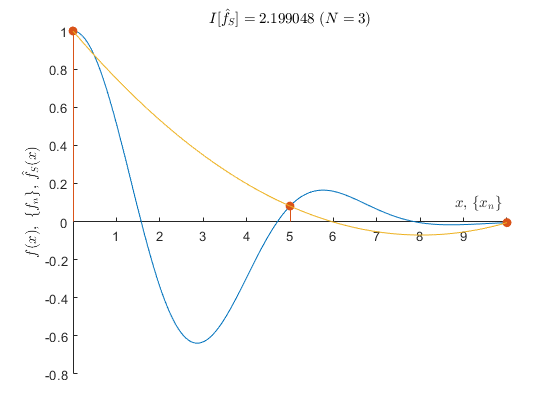

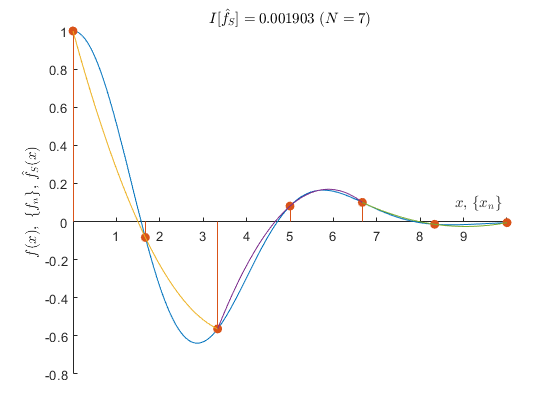

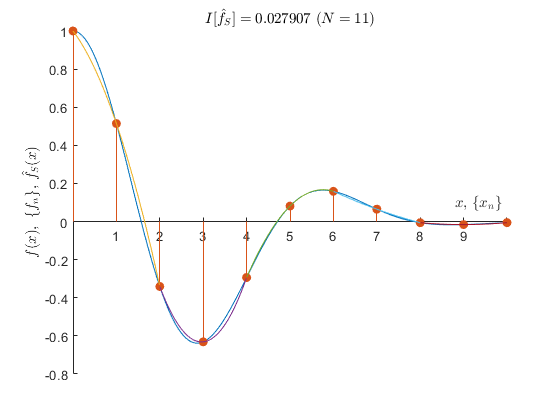

In [7]:
for Ns = 3:4:11
    dxs = (b-a)/(Ns-1)
    xs = linspace(a,b,Ns);
    fxs = f(xs);
    Ifs = (fxs(1)+4*sum(fxs(2:2:end-1))+2*sum(fxs(3:2:end-2))+fxs(end))/3*dxs;    % Eq. (4)
    
    figure
    hold on
    plot(x,fx)
    stem(xs,fxs,"filled")
    for n = 1:2:Ns-2
        p = polyfit(xs(n:n+2),fxs(n:n+2),2);
        xn = x(xs(n)<=x & x<=xs(n+2));
        pxn = polyval(p,xn);
        plot(xn,pxn)
    end
    hold off
    title(sprintf("$I[\\hat{f}_S]=%f\\ (N=%d)$",[Ifs,Ns]),"interpreter","latex")
    xlabel("$x,\, \{x_n\}$","interpreter","latex")
    ylabel("$f(x),\ \{f_n\},\, \hat{f}_S(x)$","interpreter","latex")
    set(gca,'XAxisLocation','origin','YAxisLocation','origin')
end

Simpson's method has an impressively small error of order $\mathcal{O}(\Delta x^4)$! And we can see that we get fairly close to the "true" value for the integral with merely 11 sampled points.

By this point, you may be asking, "Why stop there?" There is no reason one couldn't use the $m$-th degree polynomial interpolation scheme $\hat{f}(x) = P_m^{(n)}(x)$ for $x\in(x_n,x_{n+m})$. This general scheme is called the **Newton-Cortes rules**, where $m=1$ corresponds to the trapezoidal rule and $m=2$ corresponds to Simpson's 1/3 rule. The $m=3$ uses a cubic interpolation and is called **Simpson's 3/8 rule**, and the $m=4$ case using quartic functions is known as **Boole's rule**.

There are reasons (numerical or otherwise) to keep the interpolation degree low enough, and many modern quadrature techniques are extensions of these methods.